In [41]:
products

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,4579,3107,1,20,453441.0,364,2655,2,2,85246,2213,2010,1000446431,4269,55.00,24
1,4920,593,0,36,999999.0,676,2655,2,8,78829,2213,2010,1000010431,5121,30.00,24
2,6151,4174,0,21,400064.0,102,2655,2,13,1064,216,23,1000077851005,1617,418.95,24
3,6193,5223,1,21,400099.0,595,2615,0,14,51080,2213,2010,1000443231,4364,70.00,24
4,416,5595,1,20,474001.0,243,2655,2,9,21911,225,1723,300481741,3472,34.20,24
5,680,3257,2,36,999999.0,629,2655,2,4,22778,2213,2010,300648527,2354,249.00,24
6,805,3408,1,21,401105.0,555,2906,3,11,33822,1271,142,1000479429005,5228,1503.75,24
7,987,2490,1,36,456335.0,356,2655,2,2,82493,2213,2010,1000446514,4340,90.00,24
8,1031,3486,0,10,122002.0,721,3692,5,5,11873,2213,2010,1000257325,528,113.44,24
9,1404,5230,1,30,625011.0,387,4986,6,13,79027,2213,2010,108014378,4484,72.00,24


In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib notebook

In [53]:
products=pd.read_csv('/home/lisy/hacker_earth/kmeansclustering-futuredatathon/cproducts.csv')
tender=pd.read_csv('/home/lisy/hacker_earth/kmeansclustering-futuredatathon/ctender.csv')

In [4]:
len(products['discountUsed'].unique())

28

In [5]:
len(products['sale_price_after_promo'].unique())

2945

In [6]:
len(products['product_description'].unique())

5997

In [7]:
len(products['product_code'].unique())

6000

In [8]:
len(products['promotion_description'].unique())

2011

In [9]:
len(products['promo_code'].unique())

2214

In [18]:
len(products['transaction_number_by_till'].unique())

11127

In [17]:
len(products['till_no'].unique())

25

In [16]:
len(products['store_description'].unique())

7

In [15]:
len(products['store_code'].unique())

7

In [14]:
len(products['PinCode'].unique())

1354

In [13]:
len(products['State'].unique())

38

In [10]:
len(products[products['Gender']=='male'])

7991

In [11]:
len(products[products['Gender']=='female'])

2953

In [8]:
len(products)

11972

In [7]:
len(products['customerID'].unique())

10410

In [10]:
#colormap=['red','yellow','blue','black']
colormap  = np.array(['red','yellow','blue','black','blue','yellow','pink','violet','orange','brown','indigo','lime','grey','maroon'])

In [54]:
products['promotion_description'].fillna('no_promo', inplace=True)
products['Gender'].fillna('no_gender', inplace=True)
products['State'].fillna('no_state', inplace=True)
products['PinCode'].fillna(-1, inplace=True)
products['DOB'].fillna("2017-12-14", inplace=True)

In [55]:
d=[]
d=products['DOB']
for i in range(len(d)):
    if d[i]=='NANA':
        d[i]='2017-12-14'
#products.loc[d=='NANA']='2017-12-14'
productslist=((pd.to_datetime(dt.datetime.now())-pd.to_datetime(d)).astype('<m8[Y]'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [56]:
for c in products.columns:
    print (products[c].dtype)
    lbl = LabelEncoder()
    if products[c].dtype==object:
        print(c)
        products[c] = lbl.fit_transform(products[c])
#for c in products.columns:
#    print (products[c].dtype)

object
customerID
object
DOB
object
Gender
object
State
float64
object
transactionDate
int64
object
store_description
int64
int64
object
promo_code
object
promotion_description
int64
object
product_description
float64
object
discountUsed


# promo code dropping

In [31]:
validate=products[['promo_code','promotion_description']]

In [18]:
list(validate['promo_code'].unique())

[2213,
 216,
 225,
 1271,
 1325,
 521,
 478,
 541,
 11,
 1171,
 1168,
 949,
 1322,
 1247,
 697,
 1967,
 1285,
 413,
 1949,
 931,
 1495,
 529,
 1051,
 390,
 1820,
 614,
 1118,
 2174,
 1433,
 1357,
 1916,
 1060,
 817,
 2000,
 572,
 2124,
 263,
 1246,
 564,
 1701,
 381,
 550,
 1804,
 1466,
 188,
 1691,
 430,
 995,
 1339,
 1992,
 1062,
 2190,
 350,
 897,
 1175,
 2184,
 2188,
 832,
 1888,
 538,
 1363,
 1515,
 528,
 714,
 1881,
 971,
 1827,
 2036,
 1793,
 2035,
 903,
 1761,
 803,
 1069,
 475,
 1459,
 2025,
 14,
 1794,
 1409,
 669,
 1663,
 124,
 523,
 62,
 1428,
 1504,
 1646,
 589,
 1590,
 1273,
 870,
 2067,
 1621,
 1245,
 1618,
 1961,
 785,
 2162,
 119,
 122,
 1932,
 562,
 1556,
 1878,
 1558,
 1032,
 866,
 965,
 522,
 1923,
 1891,
 1449,
 2160,
 120,
 391,
 1717,
 1971,
 1328,
 1167,
 1933,
 1315,
 1199,
 1719,
 963,
 1065,
 1858,
 1411,
 2157,
 2054,
 1702,
 438,
 1393,
 1508,
 1382,
 1728,
 1139,
 1643,
 662,
 1542,
 207,
 530,
 1213,
 1510,
 126,
 555,
 845,
 327,
 973,
 461,
 288,
 100,


In [39]:
validate[validate['promo_code']==2213]
validate[validate['promo_code']==225]
validate[validate['promo_code']==1879]
validate[validate['promo_code']==2213]

,promo_code,promotion_description
0,2213,2010
1,2213,2010
3,2213,2010
5,2213,2010
7,2213,2010
8,2213,2010
9,2213,2010
16,2213,2010
19,2213,2010
21,2213,2010


In [20]:
originaldata=pd.read_csv('/home/lisy/hacker_earth/kmeansclustering-futuredatathon/cproducts.csv')

In [34]:
#originaldata['transactionDate'].value_counts()[:200]

In [35]:
#originaldata[originaldata['transactionDate']=='2017-03-29']

In [36]:
datecheck=originaldata[originaldata['store_description']=='BB-INDORE-MALHAR MEGA MALL']

In [40]:
datecheck[datecheck['transactionDate']=='2016-05-01']

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback
401,BBID_2046879,1990-12-01,male,NaN,999999.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,9,37456,0001127318,MDHO 35.0 Rs OFF Handwash,300988516,LIFEBUOY HANDWASH COOL FRESH PP 900ml,125.00,Payback
626,BBID_20411186,1984-03-07,female,PUNJAB,141010.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,7,41527,NONPROMO,NaN,1000531403,SOFRSH VD COOKIES MILK TB 200G,80.00,Payback
2338,BBID_20439540,1987-12-16,male,MADHYA PRADESH,452004.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,13,32614,0001127319,MDHO 31.0 Rs OFF Body Wash/Gels,108014145,PALMOLIVE SHWRGEL ABSOLUTE RELAXING 250M,129.00,Payback
2778,BBID_20447788,1984-07-01,male,MADHYA PRADESH,452001.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85069,NONPROMO,NaN,500096181,FB SIS NAMKEENS,40.00,Payback
4541,BBID_20485106,1962-12-29,male,MADHYA PRADESH,452016.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,1,54168,NONPROMO,NaN,108100145,BANANA ROBUSTA RAW,21.23,BBProfitClub
5002,BBID_20489553,1965-11-20,male,MADHYA PRADESH,452010.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,8,44022,NONPROMO,NaN,108004262,SAFFOLA TOTAL SAFF & RICEBRAN OIL JR 1L,185.00,"BBProfitClub,Payback"
5201,BBID_20491235,1984-01-01,male,MADHYA PRADESH,999999.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,6,53860,NONPROMO,NaN,1000526685,Egg Box New,198.00,BBProfitClub
6214,BBID_2045624,1978-11-15,male,MAHARASHTRA,440022.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,9,37346,NONPROMO,NaN,300251225,DAMMANI GROUNDNUT OIL PP 1L,321.00,"T24Club,Payback"
6724,BBID_204104952,NANA,NaN,NaN,NaN,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,9,37406,NONPROMO,NaN,108100336,ROUND GOURD,24.82,"FGShoppingFest,Payback"


In [39]:
datecheck['transactionDate'].unique()

array(['2016-05-01', '2017-03-09', '2015-08-12', '2015-12-31',
       '2017-01-21', '2016-04-23', '2016-11-27', '2017-06-23',
       '2015-10-10', '2016-08-12', '2016-10-15', '2016-05-22',
       '2017-01-16', '2016-11-14', '2015-11-03', '2017-03-13',
       '2017-03-05', '2015-12-21', '2017-05-24', '2016-07-10',
       '2016-02-28', '2017-04-12', '2017-03-23', '2016-03-03',
       '2016-09-18', '2016-01-09', '2016-03-14', '2017-06-10',
       '2015-12-05', '2016-09-20', '2016-09-25', '2015-11-05',
       '2016-01-25', '2016-04-24', '2017-04-09', '2017-04-29',
       '2016-01-31', '2015-11-15', '2016-09-21', '2016-03-24',
       '2016-12-12', '2017-01-25', '2015-09-25', '2015-08-28',
       '2016-12-18', '2016-08-13', '2015-08-07', '2016-02-07',
       '2016-01-01', '2015-08-29', '2015-08-26', '2017-01-26',
       '2017-03-12', '2016-01-12', '2016-04-26', '2015-10-18',
       '2017-01-14', '2016-01-24', '2017-04-14', '2016-02-06',
       '2017-04-03', '2015-12-24', '2017-02-06', '2015-

In [10]:
original_check=originaldata[['promo_code','promotion_description']]

In [11]:
list(original_check['promo_code'].unique())

['NONPROMO',
 '0000971754',
 '0000974126',
 '0001203034',
 '0001213777',
 '0001066428',
 '0001054778',
 '0001072310',
 '0000869304',
 '0001188959',
 '0001188261',
 '0001152512',
 '0001213128',
 '0001196762',
 '0001112981',
 '0001293877',
 '0001204289',
 '0001041645',
 '0001292414',
 '0001150106',
 '0001229031',
 '0001069382',
 '0001165339',
 '0001039150',
 '0001275747',
 '0001087868',
 '0001177877',
 '5030',
 '0001225163',
 '0001215629',
 '0001286089',
 '0001166050',
 '0001130767',
 '0001294889',
 '0001079552',
 '4130',
 '0000996082',
 '0001196585',
 '0001078666',
 '0001259216',
 '0001037493',
 '0001074547',
 '0001273974',
 '0001226966',
 '0000966514',
 '0001258499',
 '0001043989',
 '0001156218',
 '0001214448',
 '0001294676',
 '0001166112',
 '5050',
 '0001029592',
 '0001143398',
 '0001189460',
 '5040',
 '5045',
 '0001133910',
 '0001283170',
 '0001071743',
 '0001217154',
 '0001233283',
 '0001069319',
 '0001115885',
 '0001282899',
 '0001154622',
 '0001276523',
 '0001302419',
 '0001272343

In [12]:
original_check[original_check['promo_code']=='0000974126']
original_check[original_check['promo_code']=='0001228643']

,promo_code,promotion_description
1021,0001228643,IZ 6% DISC WED FOOD EXC
1515,0001228643,IZ 6% DISC WED FOOD EXC
1918,0001228643,IZ 6% DISC WED FOOD EXC
2053,0001228643,IZ 6% DISC WED FOOD EXC
3361,0001228643,IZ 6% DISC WED FOOD EXC
3607,0001228643,IZ 6% DISC WED FOOD EXC
4178,0001228643,IZ 6% DISC WED FOOD EXC
7118,0001228643,IZ 6% DISC WED FOOD EXC
9483,0001228643,IZ 6% DISC WED FOOD EXC
10186,0001228643,IZ 6% DISC WED FOOD EXC


# store code dropping

In [13]:
original_storecode=originaldata[['store_code','store_description']]

In [14]:
original_storecode['store_code'].unique()

array([2655, 2615, 2906, 3692, 4986, 4796, 4843])

In [15]:
original_storecode[original_storecode['store_code']==4843]

,store_code,store_description
7071,4843,BB-JAMSHEDPUR-NH-33
7072,4843,BB-JAMSHEDPUR-NH-33
7134,4843,BB-JAMSHEDPUR-NH-33
7135,4843,BB-JAMSHEDPUR-NH-33
7136,4843,BB-JAMSHEDPUR-NH-33
7137,4843,BB-JAMSHEDPUR-NH-33
7139,4843,BB-JAMSHEDPUR-NH-33
7140,4843,BB-JAMSHEDPUR-NH-33
7141,4843,BB-JAMSHEDPUR-NH-33
7142,4843,BB-JAMSHEDPUR-NH-33


# product code drop

In [16]:
originalproductdrop=originaldata[['product_code','product_description']]

In [17]:
list(originalproductdrop['product_code'].unique())

[1000446431,
 1000010431,
 1000077851005,
 1000443231,
 300481741,
 300648527,
 1000479429005,
 1000446514,
 1000257325,
 108014378,
 1000323996,
 108001161,
 108017906,
 1000258675,
 300158262,
 1000218054001,
 108004629,
 1000200229014,
 1000391224,
 1000109064,
 830010604003,
 300142841,
 1000091208,
 300047282,
 301018395,
 300481742,
 1000249761004,
 1000474761,
 1000438421014,
 108018123,
 300776410,
 108100207,
 108004590,
 300863237,
 1000680710002,
 108100277,
 1000638606,
 108029256,
 108032496,
 300658528,
 300776411,
 1000446187,
 108020365,
 300785148,
 300934698,
 1000535743,
 108100183,
 108020344,
 300091863,
 1000109366,
 1000443619003,
 108100127,
 108004055,
 830013843009,
 108015133,
 108029656,
 300111517,
 108100294,
 108100330,
 108040056,
 108004399,
 108019975,
 100105102,
 108037537,
 300785150,
 1000541353,
 300705601,
 300535523,
 108028900,
 108004592,
 300360644,
 108100331,
 300776409,
 108100382,
 108000537,
 108037568,
 300980417,
 300963413,
 100013563

In [18]:
originalproductdrop[originalproductdrop['product_code']==208001931]

,product_code,product_description
305,208001931,CELERY
3877,208001931,CELERY


In [39]:
products.columns

Index(['customerID', 'DOB', 'Gender', 'State', 'PinCode', 'transactionDate',
       'store_code', 'store_description', 'till_no',
       'transaction_number_by_till', 'promo_code', 'promotion_description',
       'product_code', 'product_description', 'sale_price_after_promo',
       'discountUsed'],
      dtype='object')

In [12]:
products=products.drop('sale_price_after_promo',axis=1)
#products=products.drop('promo_code',axis=1)
products=products.drop('store_code',axis=1)
#products=products.drop('product_code',axis=1)

In [21]:
#products=products.drop('DOB',axis=1)
#products=products.drop('Gender',axis=1)
#products=products.drop('State',axis=1)

In [57]:
store1=products[products['store_description']==2]

In [58]:
store2=products[products['store_description']==0]
store3=products[products['store_description']==3]
store4=products[products['store_description']==5]
store5=products[products['store_description']==6]
store6=products[products['store_description']==1]
store7=products[products['store_description']==4]

# store1  2655

In [59]:
feature=store1.columns

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [21]:
store1=scaler.fit_transform(store1)

In [66]:
scaler.fit_transform(store1['customerID'].values)

ValueError: Expected 2D array, got 1D array instead:
array=[ 4579.  4920.  6151. ...,    52.  1955.  5747.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [62]:
for i in store1.columns:
    scaler = StandardScaler()
    store1[i]=scaler.fit_transform(store1[i])
    

ValueError: Expected 2D array, got 1D array instead:
array=[ 4579.  4920.  6151. ...,    52.  1955.  5747.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
score=[]
for i in range (2,11):
    km1 = KMeans(n_clusters=i)
    km2 = km1.fit(store1)
    label = km2.predict(store1)
    silhouette=silhouette_score(store1, label)
    #print(silhouette)
    score.append(silhouette)



In [25]:
list(zip(([2,3,4,5,6,7,8,9,10]),score))

[(2, 0.21793949375215496),
 (3, 0.1391253963898679),
 (4, 0.15302603766213974),
 (5, 0.14032645575372382),
 (6, 0.14766212221260194),
 (7, 0.1517606054098582),
 (8, 0.15493490792832074),
 (9, 0.1361901674871909),
 (10, 0.12992118677365319)]

<IPython.core.display.Javascript object>


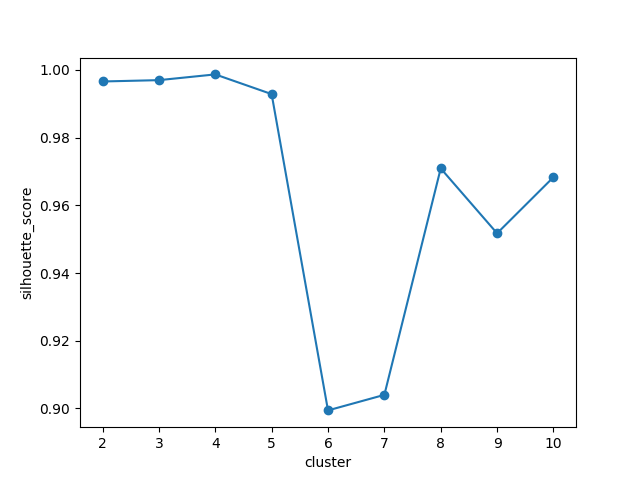

In [18]:
plt.figure()
plt.plot([2,3,4,5,6,7,8,9,10],score,'-o');
plt.xlabel('cluster');
plt.ylabel('silhouette_score');

In [48]:
km1 = KMeans(n_clusters=2)
km2 = km1.fit(store1)
label = km2.predict(store1)

In [49]:
a=pd.DataFrame(data=store1[1:,1:])

In [50]:
a.columns=[ 'DOB', 'Gender', 'State', 'PinCode', 'transactionDate',
       'store_code', 'store_description', 'till_no',
       'transaction_number_by_till', 'promo_code', 'promotion_description',
       'product_code', 'product_description', 'sale_price_after_promo',
       'discountUsed']

<IPython.core.display.Javascript object>


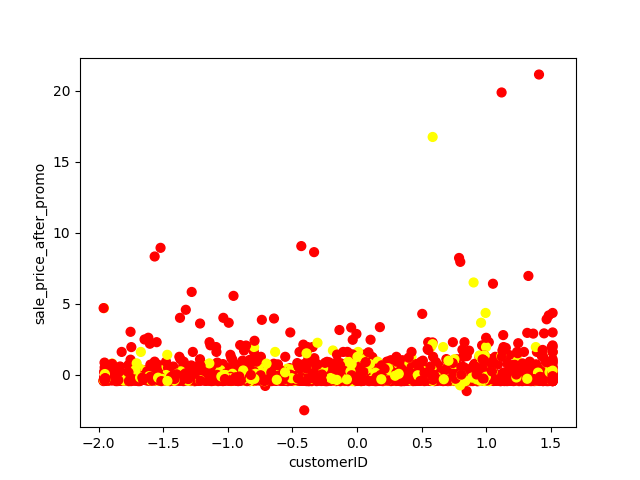

In [51]:
plt.figure()
plt.scatter(a['DOB'],a['sale_price_after_promo'], c=colormap[label], s=40);
plt.xlabel('customerID');
plt.ylabel('sale_price_after_promo');


In [101]:
from sklearn.feature_selection import SelectKBest,f_classif

In [102]:
selector = SelectKBest(f_classif,k='all')
selector.fit(store1[feature], label)

/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [6] are constant.
  UserWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k='all', score_func=<function f_classif at 0x7ffaa2f6c1e0>)

In [103]:
scores = -np.log10(selector.pvalues_)
list(zip(store1.columns,scores))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


[('customerID', 0.49780136171766454),
 ('DOB', 2.8563690379286046),
 ('Gender', 0.058049377024302573),
 ('State', 0.21302191183940755),
 ('PinCode', 0.26000540619115359),
 ('transactionDate', 0.50398271840053233),
 ('store_description', nan),
 ('till_no', 3.4218396517258793),
 ('transaction_number_by_till', 0.055719125989594713),
 ('promo_code', 14.901424407561208),
 ('promotion_description', 40.464065766980582),
 ('product_code', inf),
 ('product_description', 1.5994509998548496),
 ('discountUsed', 3.8406428918045967)]

In [104]:
selector.pvalues_

array([  3.17832745e-01,   1.39197348e-03,   8.74884300e-01,
         6.12319497e-01,   5.49534033e-01,   3.13341041e-01,
                    nan,   3.78582337e-04,   8.79591196e-01,
         1.25480313e-15,   3.43505925e-41,   0.00000000e+00,
         2.51506376e-02,   1.44330165e-04])

<IPython.core.display.Javascript object>


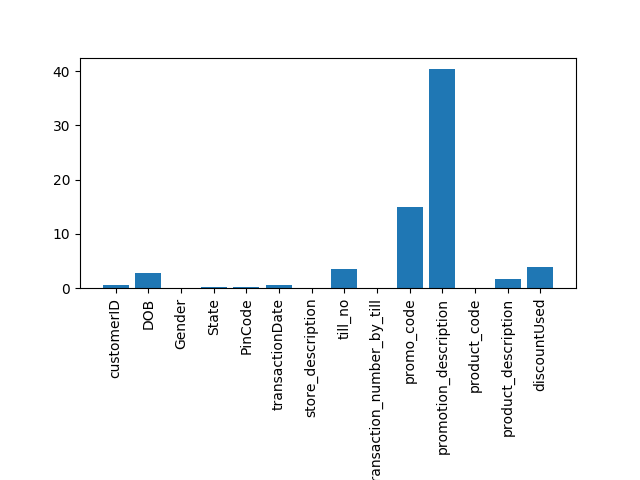

In [72]:

import matplotlib.pyplot as plt
plt.figure()
plt.bar(range(len(store1.columns)), scores)
plt.xticks(range(len(store1.columns)), store1.columns, rotation='vertical')
plt.subplots_adjust(bottom=0.4)


<IPython.core.display.Javascript object>


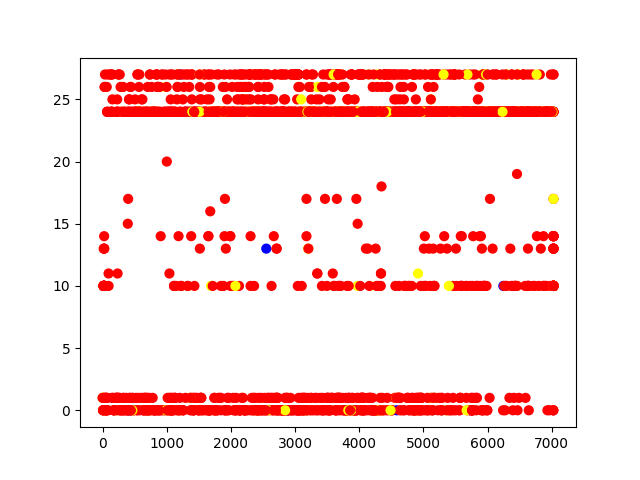

In [25]:
plt.figure()
plt.scatter(store1['DOB'],store1['discountUsed'], c=colormap[label], s=40);

In [73]:
#from sklearn.preprocessing import StandardScaler

In [74]:
#store1=store1.drop('customerID',axis=1)

In [75]:
#store1=store1.drop('product_code',axis=1)

In [76]:
#features = ['customerID', 'DOB', 'Gender', 'State', 'PinCode', 'transactionDate',
#       'store_description', 'till_no', 'transaction_number_by_till',
#       'promo_code', 'promotion_description', 'product_code',
#       'product_description', 'discountUsed']


In [93]:
#store1[store1['discountUsed'].isnull()]
#for i in feature[1:]:
#    store1[i] = StandardScaler().fit_transform(store1[i])

In [90]:
#x = store1.loc[:, features].values

In [89]:
#
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(x)
#feature

In [92]:

#store1

In [21]:
store1['till_no'].value_counts()

2     342
4     341
6     290
7     220
8     218
9     200
11    196
10    167
5     164
1     133
12    128
13    121
14     76
3      61
15     32
16     27
17     16
18     15
19      9
21      5
20      4
24      2
Name: till_no, dtype: int64

# store2 2615

In [37]:
feature=store2.columns

In [45]:
store2=scaler.fit_transform(store2)

In [46]:
score1=[]
for i in range (2,11):
    km1 = KMeans(n_clusters=i)
    km2 = km1.fit(store2)
    label = km2.predict(store2)
    silhouette=silhouette_score(store2, label)
    #print(silhouette)
    score1.append(silhouette)

In [47]:
list(zip(([2,3,4,5,6,7,8,9,10]),score1))

[(2, 0.14626290163257516),
 (3, 0.14225650510583424),
 (4, 0.15264714690227463),
 (5, 0.15731796428534858),
 (6, 0.16349338144198253),
 (7, 0.15195855686333873),
 (8, 0.15027571051897623),
 (9, 0.16370002829826091),
 (10, 0.15467669739472695)]

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


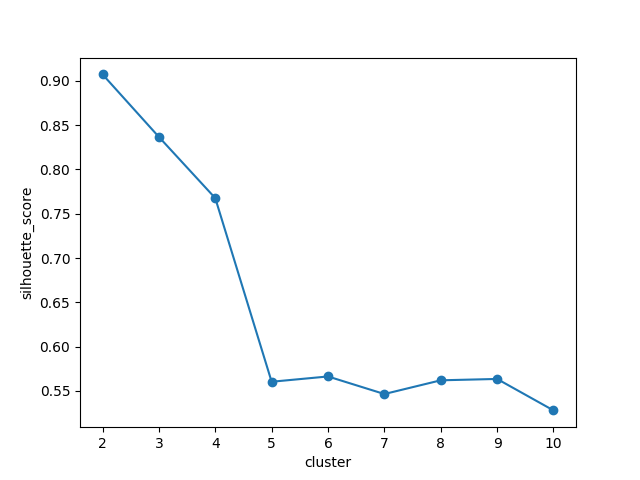

In [90]:
plt.figure()
plt.plot([2,3,4,5,6,7,8,9,10],score1,'-o');
plt.xlabel('cluster');
plt.ylabel('silhouette_score');

In [91]:
km1 = KMeans(n_clusters=2)
km2 = km1.fit(store2[feature])
label = km2.predict(store2[feature])

In [92]:
from sklearn.feature_selection import SelectKBest,f_classif

In [93]:
selector = SelectKBest(f_classif,k='all')
selector.fit(store2[feature], label)

/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k='all', score_func=<function f_classif at 0x7fd77c7061e0>)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


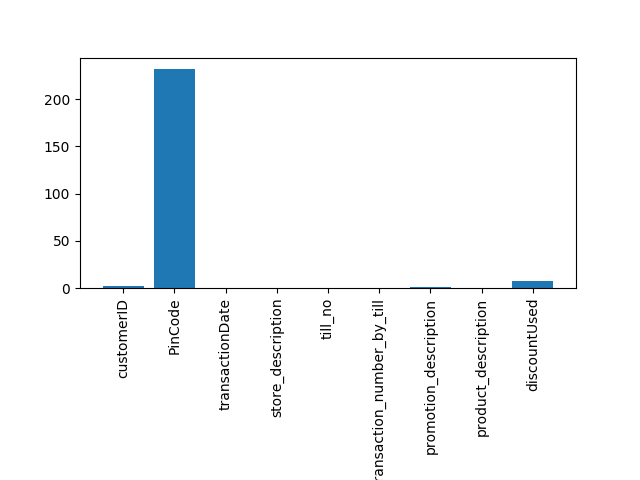

In [94]:
scores = -np.log10(selector.pvalues_)
import matplotlib.pyplot as plt
plt.figure()
plt.bar(range(len(store2.columns)), scores)
plt.xticks(range(len(store2.columns)), store2.columns, rotation='vertical')
plt.subplots_adjust(bottom=0.4)

In [27]:
list(zip(store2.columns,scores))

[('customerID', 6.6602915225072037),
 ('DOB', 0.7505023389022949),
 ('Gender', 1.8484179113755175),
 ('State', 1.6461083310843623),
 ('PinCode', 0.013091541594348836),
 ('transactionDate', 8.1681068122073377),
 ('store_code', nan),
 ('store_description', nan),
 ('till_no', 1.0378934038333716),
 ('transaction_number_by_till', 1.6447046814012074),
 ('promo_code', 0.47119681088799437),
 ('promotion_description', 7.4858687688753109),
 ('product_code', inf),
 ('product_description', 0.23579730249574343),
 ('sale_price_after_promo', 8.2325875085843219),
 ('discountUsed', 0.27543398573910161)]

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


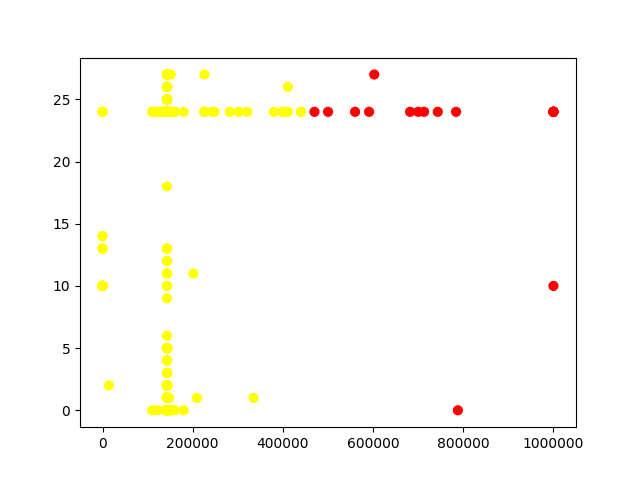

In [95]:
plt.figure()
plt.scatter(store2['PinCode'],store2['discountUsed'], c=colormap[label], s=40);

In [45]:
store2['till_no'].value_counts()

9     92
10    91
12    85
11    84
13    63
4     52
14    45
8     43
3     43
2     41
5     37
15    24
1     19
7      2
6      2
Name: till_no, dtype: int64

# store3 2906

<IPython.core.display.Javascript object>


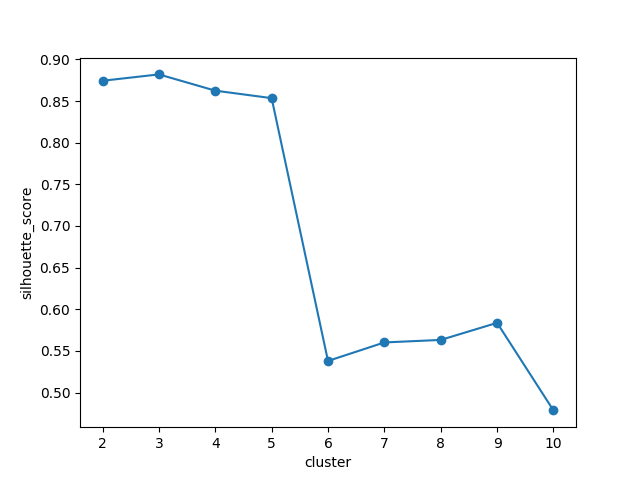

In [81]:
feature=store3.columns
score3=[]
for i in range (2,11):
    km1 = KMeans(n_clusters=i)
    km2 = km1.fit(store3[feature])
    label = km2.predict(store3[feature])
    silhouette=silhouette_score(store3[feature], label)
    #print(silhouette)
    score3.append(silhouette)
plt.figure()
plt.plot([2,3,4,5,6,7,8,9,10],score3,'-o');
plt.xlabel('cluster');
plt.ylabel('silhouette_score');

In [82]:
list(zip(([2,3,4,5,6,7,8,9,10]),score3))

[(2, 0.87439663920455846),
 (3, 0.88204227205369357),
 (4, 0.86251841585865607),
 (5, 0.85351953562524663),
 (6, 0.53792046005148342),
 (7, 0.56016567165290787),
 (8, 0.56316885599440158),
 (9, 0.58369376955858865),
 (10, 0.47854121969401819)]

/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


<IPython.core.display.Javascript object>


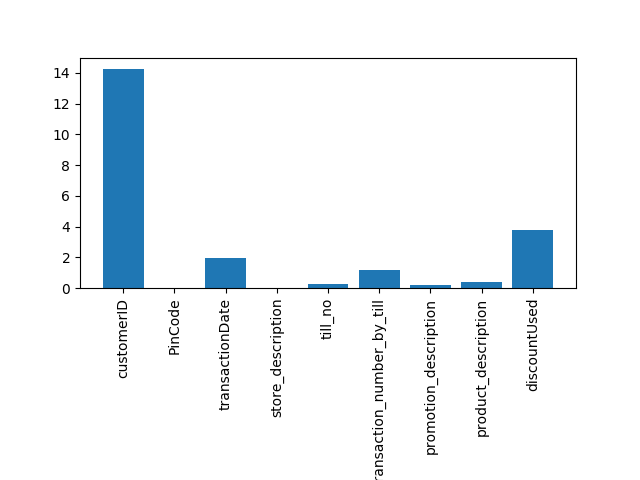

In [83]:
km1 = KMeans(n_clusters=3)
km2 = km1.fit(store3[feature])
label = km2.predict(store3[feature])
selector = SelectKBest(f_classif,k='all')
selector.fit(store3[feature], label)
scores = -np.log10(selector.pvalues_)
import matplotlib.pyplot as plt
plt.figure()
plt.bar(range(len(store3.columns)), scores)
plt.xticks(range(len(store3.columns)), store3.columns, rotation='vertical')
plt.subplots_adjust(bottom=0.4)

In [84]:
list(zip(store3.columns,scores))

[('customerID', 14.280054163914418),
 ('PinCode', inf),
 ('transactionDate', 1.9711672402171969),
 ('store_description', nan),
 ('till_no', 0.25291737141333814),
 ('transaction_number_by_till', 1.1427216203945734),
 ('promotion_description', 0.17332948884716412),
 ('product_description', 0.39183756764650257),
 ('discountUsed', 3.7876571086806594)]

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


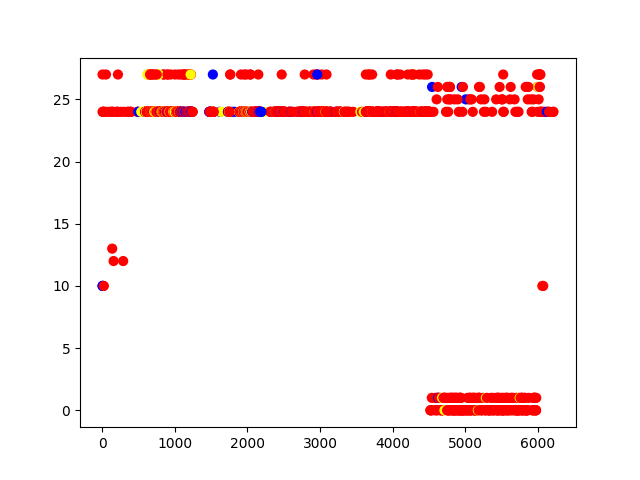

In [87]:
plt.figure()
plt.scatter(store3['customerID'],store3['discountUsed'], c=colormap[label], s=40);

In [49]:
store3['till_no'].value_counts()

4     170
6     108
7     104
5     102
12     99
3      92
9      87
11     85
8      73
10     69
19     47
2      43
14     43
1      33
13     31
15     26
18     14
17     11
20      8
16      7
21      4
23      1
Name: till_no, dtype: int64

# store4 3692

<IPython.core.display.Javascript object>


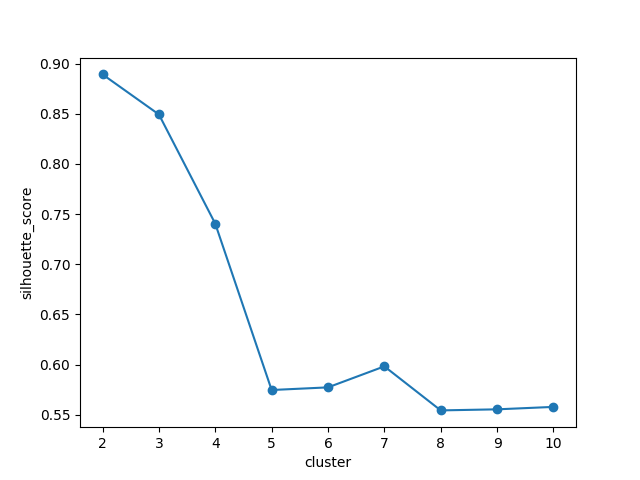

In [78]:
feature=store4.columns
score4=[]
for i in range (2,11):
    km1 = KMeans(n_clusters=i)
    km2 = km1.fit(store4[feature])
    label = km2.predict(store4[feature])
    silhouette=silhouette_score(store4[feature], label)
    #print(silhouette)
    score4.append(silhouette)
plt.figure()
plt.plot([2,3,4,5,6,7,8,9,10],score4,'-o');
plt.xlabel('cluster');
plt.ylabel('silhouette_score');

In [116]:
list(zip(([2,3,4,5,6,7,8,9,10]),score4))
#m1=(3, 0.99783954181643142)
#m2=(6, 0.99709066446448613)

[(2, 0.88880805552997666),
 (3, 0.84870464129298318),
 (4, 0.49242159550450904),
 (5, 0.5698267907040121),
 (6, 0.57242452212517481),
 (7, 0.5925493744957212),
 (8, 0.54471174815403256),
 (9, 0.53743190622156456),
 (10, 0.54894873005713607)]

/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


<IPython.core.display.Javascript object>


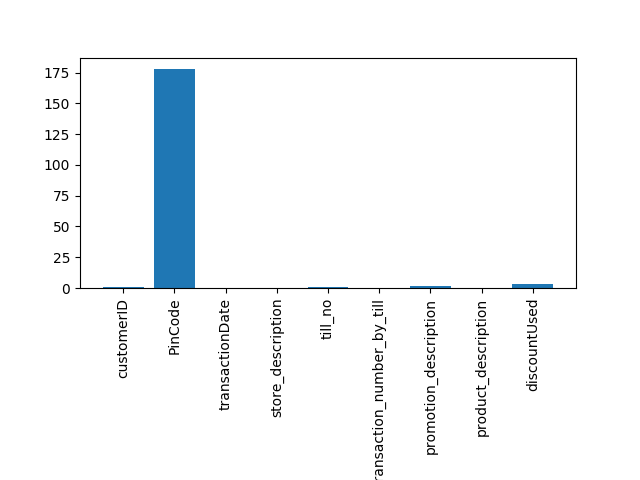

In [79]:
km1 = KMeans(n_clusters=2)
km2 = km1.fit(store4[feature])
label = km2.predict(store4[feature])
selector = SelectKBest(f_classif,k='all')
selector.fit(store4[feature], label)
scores = -np.log10(selector.pvalues_)
import matplotlib.pyplot as plt
plt.figure()
plt.bar(range(len(store4.columns)), scores)
plt.xticks(range(len(store4.columns)), store4.columns, rotation='vertical')
plt.subplots_adjust(bottom=0.4)

In [182]:
list(zip(store4.columns,scores))

[('customerID', 0.87833275725548399),
 ('DOB', 0.15982282154460783),
 ('Gender', 0.60664703355838168),
 ('State', 0.52850699069535445),
 ('PinCode', 0.071404502107135434),
 ('transactionDate', 2.2293921809740005),
 ('store_code', nan),
 ('store_description', nan),
 ('till_no', 0.87907591363455717),
 ('transaction_number_by_till', 0.40371773092827923),
 ('promo_code', 0.96727079808460459),
 ('promotion_description', 5.2603975030877939),
 ('product_code', inf),
 ('product_description', 4.6942777659668007),
 ('sale_price_after_promo', 9.9499070054327809),
 ('discountUsed', 0.25536667086822423)]

<IPython.core.display.Javascript object>


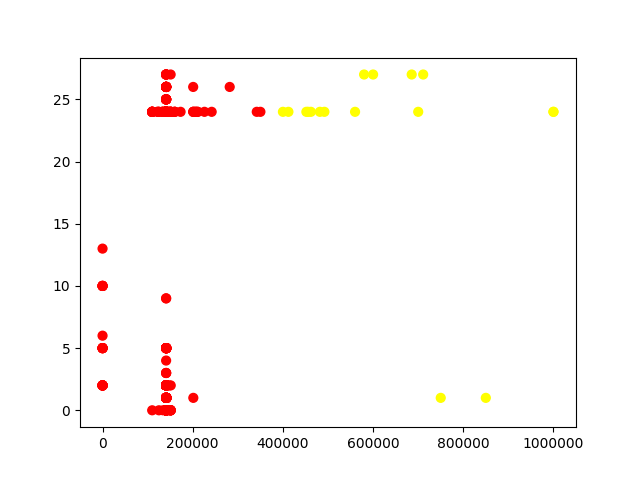

In [80]:
plt.figure()
plt.scatter(store4['PinCode'],store4['discountUsed'], c=colormap[label], s=40);

In [53]:
store4['till_no'].value_counts()

5     98
7     97
1     75
3     65
2     51
4     47
8     42
9     39
11    27
6     16
10    15
15     1
14     1
Name: till_no, dtype: int64

# store5 4986

<IPython.core.display.Javascript object>


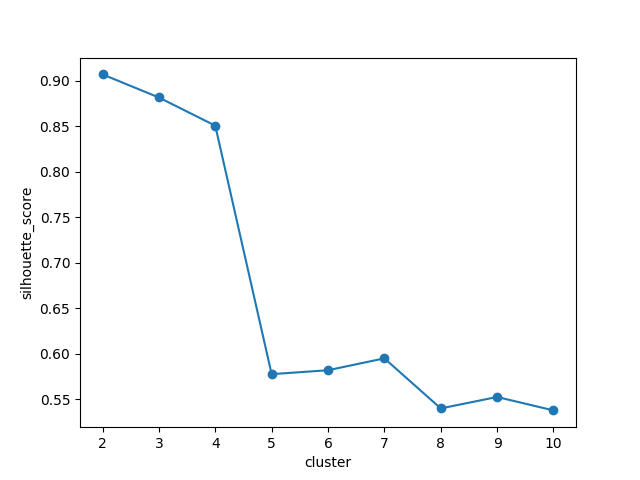

In [74]:
feature=store5.columns
score5=[]
for i in range (2,11):
    km1 = KMeans(n_clusters=i)
    km2 = km1.fit(store5[feature])
    label = km2.predict(store5[feature])
    silhouette=silhouette_score(store5[feature], label)
    #print(silhouette)
    score5.append(silhouette)
plt.figure()
plt.plot([2,3,4,5,6,7,8,9,10],score5,'-o');
plt.xlabel('cluster');
plt.ylabel('silhouette_score');

In [121]:
list(zip(([2,3,4,5,6,7,8,9,10]),score5))

[(2, 0.9067143507068679),
 (3, 0.88115232111370745),
 (4, 0.84996388189858807),
 (5, 0.57321108856534997),
 (6, 0.57737799896073572),
 (7, 0.59084468198791318),
 (8, 0.53153970089815172),
 (9, 0.54470399065323161),
 (10, 0.50060455996515407)]

/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


<IPython.core.display.Javascript object>


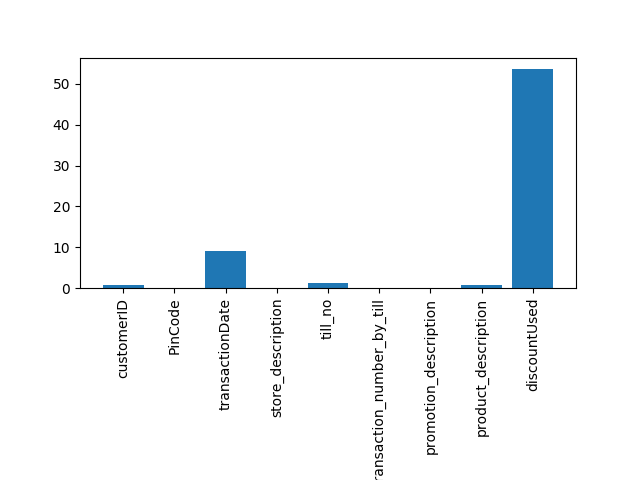

In [75]:
km1 = KMeans(n_clusters=2)
km2 = km1.fit(store5[feature])
label = km2.predict(store5[feature])
selector = SelectKBest(f_classif,k='all')
selector.fit(store5[feature], label)
scores = -np.log10(selector.pvalues_)
import matplotlib.pyplot as plt
plt.figure()
plt.bar(range(len(store5.columns)), scores)
plt.xticks(range(len(store5.columns)), store5.columns, rotation='vertical')
plt.subplots_adjust(bottom=0.4)

<IPython.core.display.Javascript object>


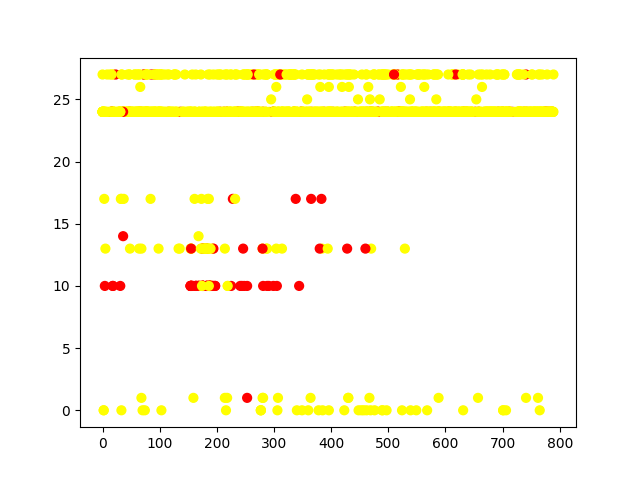

In [77]:
plt.figure()
plt.scatter(store5['transactionDate'],store5['discountUsed'], c=colormap[label], s=40);

In [123]:
list(zip(store5.columns,scores))

[('customerID', 0.71640939311125473),
 ('DOB', 10.513591886097256),
 ('Gender', 57.58518970998238),
 ('State', 72.102540541826386),
 ('PinCode', inf),
 ('transactionDate', 8.9991530113693745),
 ('store_description', nan),
 ('till_no', 1.3187861027726582),
 ('transaction_number_by_till', 0.11337884582016633),
 ('promotion_description', 0.011886198253187713),
 ('product_description', 0.6928998986931586),
 ('discountUsed', 53.758567730151803)]

In [57]:
store5['till_no'].value_counts()

13    310
11    279
22    233
1     196
16    176
8     159
20     91
25     91
6      60
10     52
9      39
19     29
15     19
21      8
5       3
3       2
4       1
Name: till_no, dtype: int64

# store6 4796

<IPython.core.display.Javascript object>


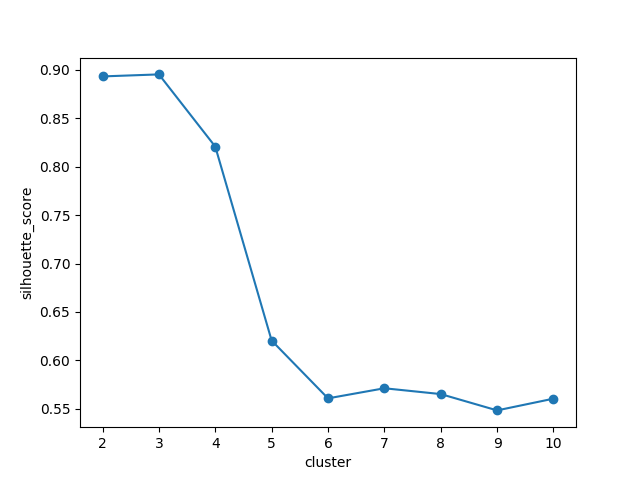

In [71]:
feature=store6.columns
score6=[]
for i in range (2,11):
    km1 = KMeans(n_clusters=i)
    km2 = km1.fit(store6[feature])
    label = km2.predict(store6[feature])
    silhouette=silhouette_score(store6[feature], label)
    #print(silhouette)
    score6.append(silhouette)
plt.figure()
plt.plot([2,3,4,5,6,7,8,9,10],score6,'-o');
plt.xlabel('cluster');
plt.ylabel('silhouette_score');

In [126]:
list(zip(([2,3,4,5,6,7,8,9,10]),score6))

[(2, 0.89271152669210918),
 (3, 0.89466864391431367),
 (4, 0.81982355630238501),
 (5, 0.61656364858459323),
 (6, 0.55432741644619166),
 (7, 0.56511278224115258),
 (8, 0.55827140249773721),
 (9, 0.54163470761787613),
 (10, 0.50091225748362589)]

/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


<IPython.core.display.Javascript object>


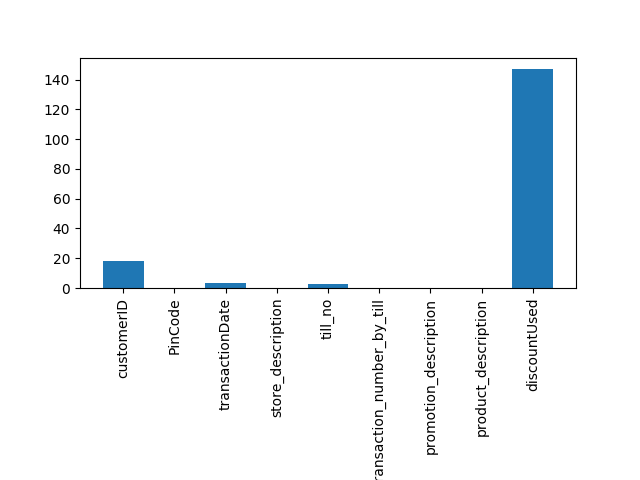

In [72]:
km1 = KMeans(n_clusters=3)
km2 = km1.fit(store6[feature])
label = km2.predict(store6[feature])
selector = SelectKBest(f_classif,k='all')
selector.fit(store6[feature], label)
scores = -np.log10(selector.pvalues_)
import matplotlib.pyplot as plt
plt.figure()
plt.bar(range(len(store6.columns)), scores)
plt.xticks(range(len(store6.columns)), store6.columns, rotation='vertical')
plt.subplots_adjust(bottom=0.4)

<IPython.core.display.Javascript object>


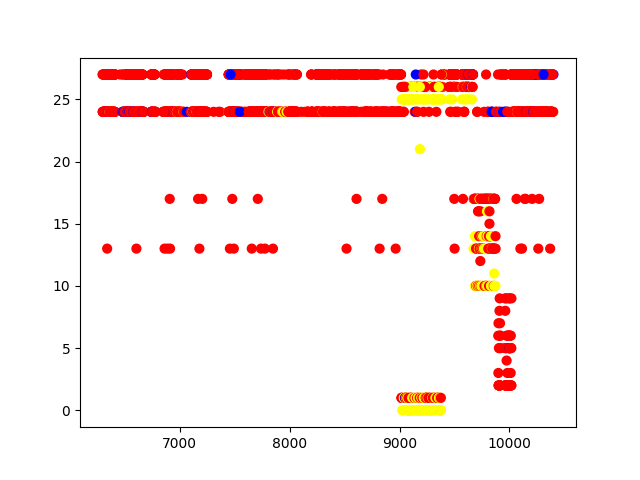

In [73]:
plt.figure()
plt.scatter(store6['customerID'],store6['discountUsed'], c=colormap[label], s=40);

In [128]:
list(zip(store6.columns,scores))

[('customerID', 18.138462929180886),
 ('DOB', 159.68490655547163),
 ('Gender', 225.95234522659712),
 ('State', 101.44744945114631),
 ('PinCode', inf),
 ('transactionDate', 3.4212501269899227),
 ('store_description', nan),
 ('till_no', 2.6924060756402124),
 ('transaction_number_by_till', 0.21407736058833049),
 ('promotion_description', 0.11608940800890459),
 ('product_description', 0.10330369706015551),
 ('discountUsed', 147.4564843805604)]

In [61]:
store6['till_no'].value_counts()

6     377
18    305
7     303
14    262
17    241
15    199
4     186
13    147
11    134
2     132
10     99
1      96
3      90
12     80
16     65
9      33
5      18
19      1
Name: till_no, dtype: int64

# store7 4843

<IPython.core.display.Javascript object>


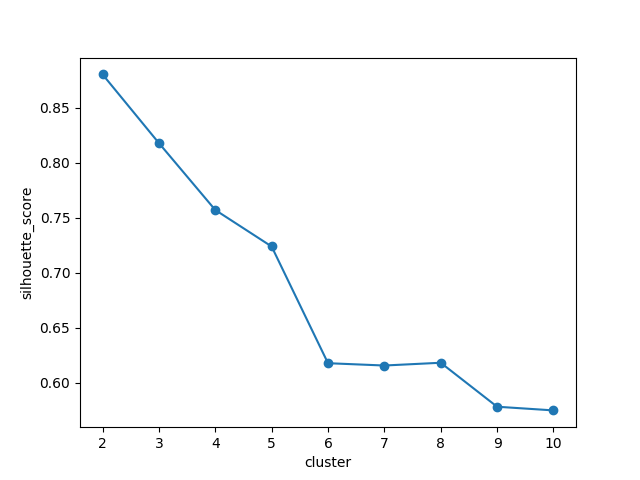

In [62]:
feature=store7.columns
score7=[]
for i in range (2,11):
    km1 = KMeans(n_clusters=i)
    km2 = km1.fit(store7[feature])
    label = km2.predict(store7[feature])
    silhouette=silhouette_score(store7[feature], label)
    #print(silhouette)
    score7.append(silhouette)
plt.figure()
plt.plot([2,3,4,5,6,7,8,9,10],score7,'-o');
plt.xlabel('cluster');
plt.ylabel('silhouette_score');

In [131]:
list(zip(([2,3,4,5,6,7,8,9,10]),score7))

[(2, 0.88034150920369869),
 (3, 0.8176463046425847),
 (4, 0.7562809840782212),
 (5, 0.70314622384757985),
 (6, 0.61374271920252477),
 (7, 0.61159338804861063),
 (8, 0.6140987416332766),
 (9, 0.57046613150415493),
 (10, 0.56683924750837633)]

/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


<IPython.core.display.Javascript object>


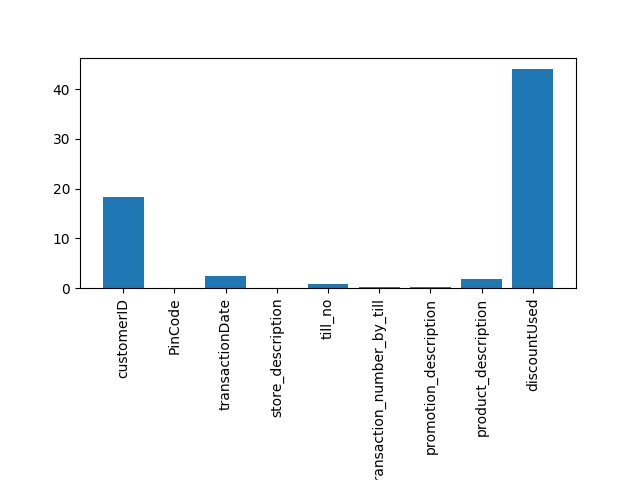

In [64]:
km1 = KMeans(n_clusters=2)
km2 = km1.fit(store7[feature])
label = km2.predict(store7[feature])
selector = SelectKBest(f_classif,k='all')
selector.fit(store7[feature], label)
scores = -np.log10(selector.pvalues_)
import matplotlib.pyplot as plt
plt.figure()
plt.bar(range(len(store7.columns)), scores)
plt.xticks(range(len(store7.columns)), store7.columns, rotation='vertical')
plt.subplots_adjust(bottom=0.4)

In [133]:
list(zip(store7.columns,scores))

[('customerID', 18.32176030282438),
 ('DOB', 37.07799479563711),
 ('Gender', 53.970073798517497),
 ('State', 8.8526798720941624),
 ('PinCode', inf),
 ('transactionDate', 2.4021817763451581),
 ('store_description', nan),
 ('till_no', 0.74403082275918386),
 ('transaction_number_by_till', 0.26449251037921073),
 ('promotion_description', 0.10992503587246839),
 ('product_description', 1.8300105899480121),
 ('discountUsed', 44.130619843427453)]

<IPython.core.display.Javascript object>


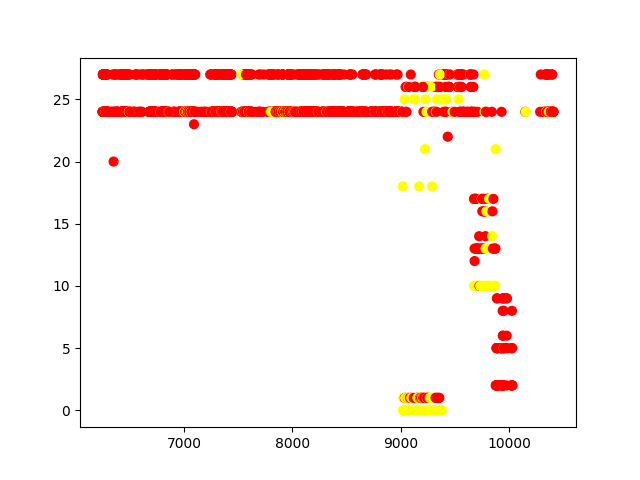

In [67]:
plt.figure()
plt.scatter(store7['customerID'],store7['discountUsed'], c=colormap[label], s=40);

<IPython.core.display.Javascript object>


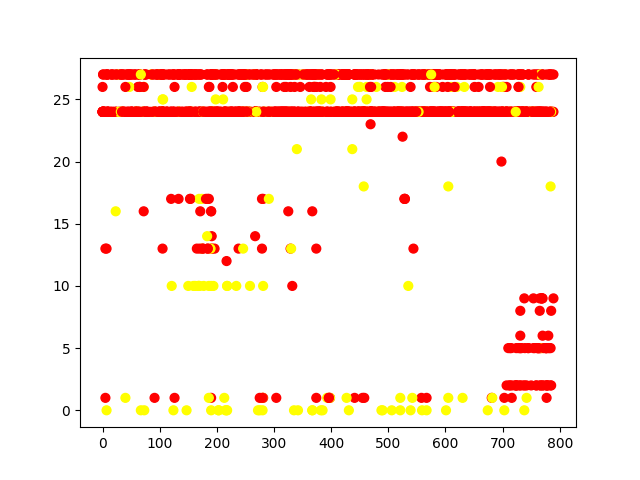

In [68]:
plt.figure()
plt.scatter(store7['transactionDate'],store7['discountUsed'], c=colormap[label], s=40);

<IPython.core.display.Javascript object>


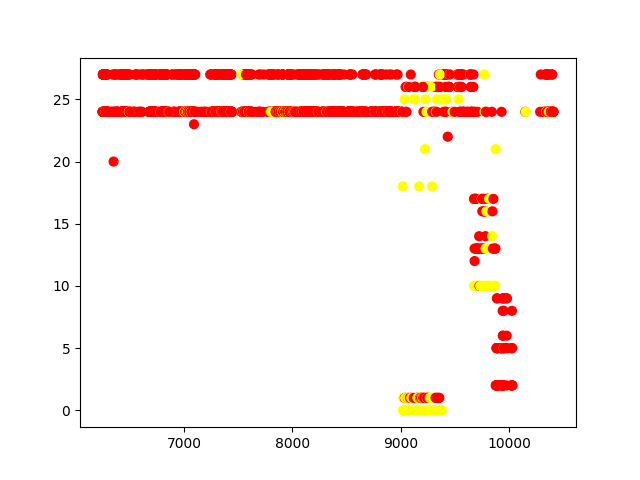

In [69]:
plt.figure()
plt.scatter(store7['customerID'],store7['discountUsed'], c=colormap[label], s=40);

In [66]:
store7

,customerID,PinCode,transactionDate,store_description,till_no,transaction_number_by_till,promotion_description,product_description,discountUsed
7071,10350,560095.0,324,4,19,52921,2010,2420,24
7072,10376,560094.0,295,4,18,10623,2010,3237,24
7134,10313,999999.0,784,4,19,21211,2010,5155,24
7135,10323,713213.0,130,4,19,37469,2010,3661,24
7136,10330,814112.0,380,4,22,18687,854,3504,24
7137,10330,814112.0,186,4,9,62561,598,1383,24
7139,10364,753014.0,578,4,5,71808,2010,555,24
7140,10371,380015.0,629,4,19,2483,2010,990,24
7141,10383,831013.0,621,4,9,41657,1517,396,24
7142,10388,781021.0,273,4,18,9992,2010,4067,24


<IPython.core.display.Javascript object>


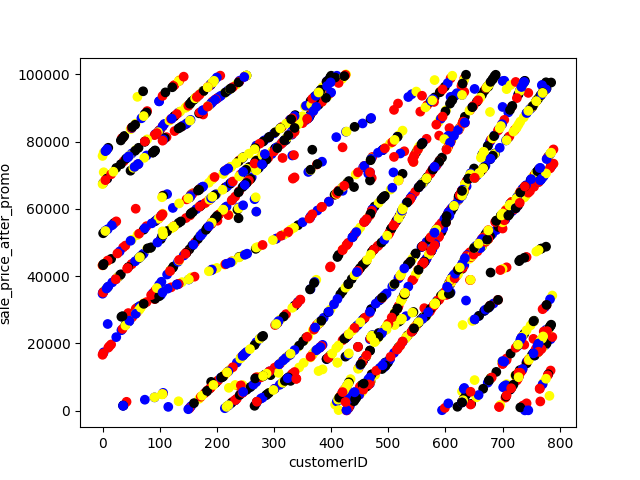

Text(0,0.5,'sale_price_after_promo')

In [140]:

plt.figure()
plt.scatter(store7['transactionDate'],store7['transaction_number_by_till'],color=['red','yellow','blue','black'])
plt.xlabel('customerID')
plt.ylabel('sale_price_after_promo')

In [46]:
store7['output']=label

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
store7_zero=store7[store7['output']==0]

In [130]:
store7_one=store7[store7['output']==1]

In [131]:
store7_two=store7[store7['output']==2]

In [132]:
store7_three=store7[store7['output']==3]

In [57]:
store7_zero

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,output
7072,10376,3964,0,17,560094.0,295,4843,4,18,10623,2213,2010,1000366424010,3237,799.00,24,0
7149,6332,1739,1,36,853022.0,224,4843,4,7,72430,2213,2010,1000215531001,431,799.00,24,0
7176,6596,5537,1,14,832110.0,92,4843,4,19,33356,2213,2010,1000147594007,3213,1098.00,24,0
7180,6690,4521,1,14,831005.0,678,4843,4,23,74715,2105,745,1000624995001,5461,2988.00,24,0
7209,7150,4795,1,36,999999.0,589,4843,4,8,81766,1304,456,1000135637011,3157,266.35,24,0
7229,7378,3299,1,14,831012.0,596,4843,4,3,54343,1410,206,1000558405004,1511,149.25,24,0
7273,7829,1284,1,14,831004.0,392,4843,4,23,15315,777,1038,1000507610001,3810,799.00,24,0
7278,7850,3647,1,36,832104.0,24,4843,4,5,72151,2213,2010,1000142141002,5183,429.00,24,0
7445,9544,3077,1,14,831001.0,38,4843,4,14,81647,27,437,1000041124012,1658,199.50,24,0
7461,9687,1536,1,14,831011.0,20,4843,4,2,55751,2213,2010,1000146124008,3369,349.00,24,0


In [58]:
store7_two

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,output
9071,8289,4544,1,14,831012.0,625,4843,4,5,84091,1513,460,300689503012,5172,349.50,24,2
9072,8290,5688,1,14,831005.0,78,4843,4,5,80640,2213,2010,300692837009,5131,299.00,24,2
9451,8821,6289,1,14,831005.0,595,4843,4,14,87413,2213,2010,300275441002,230,99.00,24,2
9820,7082,1892,1,14,831009.0,329,4843,4,7,86493,666,171,300647116012,5130,187.06,27,2
10833,9562,4768,1,14,831004.0,0,4843,4,3,16577,2213,2010,300981037031,3097,399.00,26,2


In [59]:
store7_three

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,output
7716,6248,6644,0,14,831012.0,431,4843,4,9,988,2213,2010,830011954004,2721,105.0,24,3
7987,6699,4147,1,14,831011.0,538,4843,4,7,22924,1104,418,830017234007,4420,0.0,24,3
8054,6810,6317,1,14,831018.0,654,4843,4,14,3921,2213,2010,830017605009,1221,499.0,24,3
8363,7280,6216,1,14,831004.0,699,4843,4,6,14527,1790,1128,830021452004,5248,99.0,24,3
8750,7876,5189,1,14,834001.0,629,4843,4,14,96833,1320,400,830017291001,2715,0.0,24,3
8798,7934,4677,1,4,492001.0,623,4843,4,3,63561,1320,400,830017217017,2719,0.0,24,3
8935,8110,5409,1,14,831011.0,644,4843,4,10,38841,1639,1414,830007698001,5209,103.2,24,3
9108,8345,3355,1,14,831012.0,202,4843,4,14,8926,2213,2010,830007698008,5208,129.0,24,3
10647,9529,5105,1,32,201005.0,252,4843,4,14,17399,541,501,800026870001,2761,212.7,27,3
11742,9806,4328,2,36,-1.0,162,4843,4,5,92857,2213,2010,830006282008,1223,399.0,10,3


In [61]:
len(store7[store7['promo_code']==2213])

1431

In [62]:
2135-1431

704

<IPython.core.display.Javascript object>


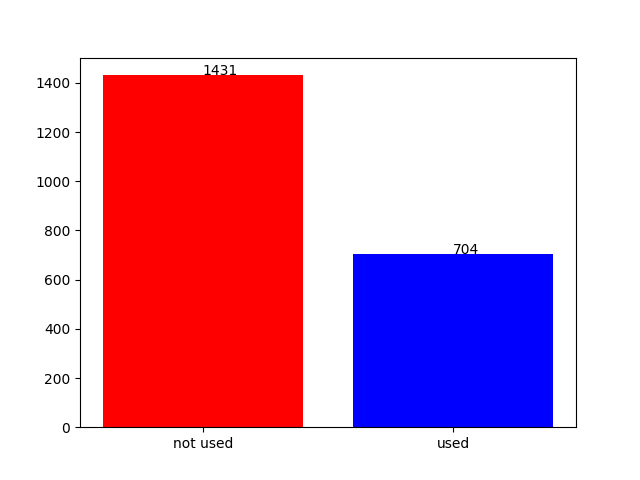

In [63]:
notused=1431
used=704
plt.figure()
plt.bar(['not used','used'],[notused,used],color=['r','b'])
for a,b in zip(['not used','used'],[notused,used]):
    plt.text(a, b, str(b))
plt.legend()

In [64]:
original=pd.read_csv('/home/lisy/hacker_earth/kmeansclustering-futuredatathon/cproducts.csv')

In [65]:
x=original[original['store_code']==4843]

In [66]:
len(x[x['promo_code']=='NONPROMO'])

1431

In [67]:
len(store7[store7['promo_code']==2213])

1431

In [68]:
count=x['PinCode'].value_counts()

In [69]:
store7['till_no'].value_counts()

5     341
3     333
9     319
7     252
14    222
23    175
19    167
22    130
10     63
6      39
17     33
2      27
8      18
18     13
16      2
11      1
Name: till_no, dtype: int64

# pincode

In [70]:
count[count>75]

831012.0    275
831001.0    172
831018.0    145
999999.0    142
831005.0    133
831011.0    118
831004.0     88
832110.0     86
Name: PinCode, dtype: int64

# promo code

In [71]:
len(x['customerID'])

2135

In [72]:
val=x['customerID'].value_counts()
#x['customerID'].value_counts()

In [73]:
greater_thn=val[val>2]
greater_thn

BBID_21142149     4
BBID_211446629    4
BBID_21149111     4
BBID_21142915     4
BBID_211414156    4
BBID_211410070    4
BBID_21141694     4
BBID_2114885      3
BBID_211420309    3
BBID_211423595    3
BBID_211421039    3
BBID_211417845    3
BBID_211427807    3
BBID_211434936    3
BBID_211421442    3
BBID_211423220    3
BBID_211430140    3
BBID_211411938    3
BBID_211436727    3
BBID_21149076     3
BBID_211412165    3
BBID_211421693    3
BBID_211423454    3
BBID_211410098    3
BBID_211449724    3
BBID_21141801     3
BBID_21141710     3
BBID_211417692    3
BBID_211434880    3
BBID_211447714    3
BBID_211423640    3
BBID_211436623    3
BBID_211452602    3
BBID_211446865    3
BBID_211410307    3
BBID_21141300     3
BBID_21141698     3
BBID_211410014    3
BBID_211410427    3
BBID_211423661    3
BBID_211437119    3
BBID_211412153    3
BBID_211415146    3
BBID_21149032     3
BBID_211434329    3
BBID_211412335    3
BBID_211416756    3
BBID_211416939    3
BBID_21142584     3
Name: customerID, dt

In [74]:
ind=greater_thn.index

In [75]:
ind

Index(['BBID_21142149', 'BBID_211446629', 'BBID_21149111', 'BBID_21142915',
       'BBID_211414156', 'BBID_211410070', 'BBID_21141694', 'BBID_2114885',
       'BBID_211420309', 'BBID_211423595', 'BBID_211421039', 'BBID_211417845',
       'BBID_211427807', 'BBID_211434936', 'BBID_211421442', 'BBID_211423220',
       'BBID_211430140', 'BBID_211411938', 'BBID_211436727', 'BBID_21149076',
       'BBID_211412165', 'BBID_211421693', 'BBID_211423454', 'BBID_211410098',
       'BBID_211449724', 'BBID_21141801', 'BBID_21141710', 'BBID_211417692',
       'BBID_211434880', 'BBID_211447714', 'BBID_211423640', 'BBID_211436623',
       'BBID_211452602', 'BBID_211446865', 'BBID_211410307', 'BBID_21141300',
       'BBID_21141698', 'BBID_211410014', 'BBID_211410427', 'BBID_211423661',
       'BBID_211437119', 'BBID_211412153', 'BBID_211415146', 'BBID_21149032',
       'BBID_211434329', 'BBID_211412335', 'BBID_211416756', 'BBID_211416939',
       'BBID_21142584'],
      dtype='object')

In [76]:
BBID_211446629=x[x['customerID']=='BBID_211446629']

In [77]:
BBID_211446629['sale_price_after_promo']

9593    870.0
9594    180.0
9595     30.0
9596     40.0
Name: sale_price_after_promo, dtype: float64

In [78]:
BBID_211446629['sale_price_after_promo'].sum()

1120.0

In [79]:
BBID_21142149=x[x['customerID']=='BBID_21142149']

In [80]:
BBID_21142149['sale_price_after_promo']

7232     115.0
10777    138.0
10831     67.0
10832    219.0
Name: sale_price_after_promo, dtype: float64

In [81]:
BBID_21142149['sale_price_after_promo'].sum()

539.0

In [82]:
x[x['customerID']=='BBID_21142149']

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
7232,BBID_21142149,1976-08-18,male,NaN,831012.0,2017-02-06,4843,BB-JAMSHEDPUR-NH-33,14,1986,NONPROMO,NaN,300444178,EVER YUTH FW NTRL GLDN GLOW PEEL OF 90g,115.0,Payback
10777,BBID_21142149,1976-08-18,male,NaN,831012.0,2016-09-23,4843,BB-JAMSHEDPUR-NH-33,5,55015,NONPROMO,NaN,1000142691,ORAL TBRUSH PRO HELTH SOFT 2+1 1P,138.0,"T24Club,Payback"
10831,BBID_21142149,1976-08-18,male,NaN,831012.0,2017-01-26,4843,BB-JAMSHEDPUR-NH-33,9,45303,NONPROMO,NaN,300481673,MAGGI NDL MASALA 420g,67.0,"T24Club,Payback"
10832,BBID_21142149,1976-08-18,male,NaN,831012.0,2017-03-06,4843,BB-JAMSHEDPUR-NH-33,7,50832,NONPROMO,NaN,300623175,GH ATTA 9 GRAIN PP 5Kg,219.0,"T24Club,Payback"


In [83]:
x[x['customerID']=='BBID_211446629']

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
9593,BBID_211446629,NaN,NaN,JHARKHAND,NaN,2016-02-06,4843,BB-JAMSHEDPUR-NH-33,22,3823,NONPROMO,NaN,1000011280,GILLETTE CARTRIDGE FUSION POWER 4P,870.0,BBProfitClub
9594,BBID_211446629,NaN,NaN,JHARKHAND,NaN,2015-11-21,4843,BB-JAMSHEDPUR-NH-33,3,58171,NONPROMO,NaN,300812356,SUNFEAST NDL YIPPEE MAGIC MSALA 240/280g,180.0,BBProfitClub
9595,BBID_211446629,NaN,NaN,JHARKHAND,NaN,2015-11-21,4843,BB-JAMSHEDPUR-NH-33,3,58171,NONPROMO,NaN,108024767,HALDIRAM NI NAMK MIXTURE 150G,30.0,BBProfitClub
9596,BBID_211446629,NaN,NaN,JHARKHAND,NaN,2016-04-02,4843,BB-JAMSHEDPUR-NH-33,19,54352,NONPROMO,NaN,108035707,TOP RAMAN NDL CHICKEN 280g,40.0,BBProfitClub


In [84]:
x[x['customerID']=='BBID_211414156']

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
7985,BBID_211414156,1976-02-05,male,JHARKHAND,831012.0,2017-01-22,4843,BB-JAMSHEDPUR-NH-33,5,85440,0001237108,IZ 299 FLAT REG LUNCH CONTAINERS,1000473523,4 pcs kids set - DisneyMickey,299.00,Payback
9949,BBID_211414156,1976-02-05,male,JHARKHAND,831012.0,2017-01-25,4843,BB-JAMSHEDPUR-NH-33,9,44701,NONPROMO,NaN,300343549,ARWA SONACHUR PREMIUM LOOSE,137.22,"T24Club,Payback"
9950,BBID_211414156,1976-02-05,male,JHARKHAND,831012.0,2017-01-07,4843,BB-JAMSHEDPUR-NH-33,5,81740,NONPROMO,NaN,108009250,EZEE DET LIQUID 500G,90.00,"T24Club,Payback"
9951,BBID_211414156,1976-02-05,male,JHARKHAND,831012.0,2016-01-08,4843,BB-JAMSHEDPUR-NH-33,9,71604,0001071299,AZ B2@25 % OFF OTHER HEAT & EAT VX EXC,300643681,ACT II IPC BUTTER DELITE 50g/70g,22.42,"T24Club,Payback"


In [85]:
x[x['customerID']=='BBID_211410070']

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
9957,BBID_211410070,1989-01-17,female,JHARKHAND,831012.0,2015-10-12,4843,BB-JAMSHEDPUR-NH-33,5,92890,0000996522,PNM TKT500 GET FESTIVE GIFT CARD FREE EZ,1000336252,F'15 Fstive Gift Card,0.00,"T24Club,Payback"
9958,BBID_211410070,1989-01-17,female,JHARKHAND,831012.0,2016-08-13,4843,BB-JAMSHEDPUR-NH-33,8,70834,NONPROMO,NaN,300519551,NAVRATNA DAL LOOSE,123.43,"T24Club,Payback"
9959,BBID_211410070,1989-01-17,female,JHARKHAND,831012.0,2016-11-20,4843,BB-JAMSHEDPUR-NH-33,5,68961,NONPROMO,NaN,1000078282,COLGATE TBRUSH 360 VSBL WHITE MED 2+1,170.00,"T24Club,Payback"
9960,BBID_211410070,1989-01-17,female,JHARKHAND,831012.0,2016-08-13,4843,BB-JAMSHEDPUR-NH-33,8,70834,NONPROMO,NaN,108011296,J&J BABY SOAP BLOSSOM 75g,45.00,"T24Club,Payback"


In [86]:
x[x['customerID']=='BBID_21141694']

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
7196,BBID_21141694,1985-10-15,male,JHARKHAND,831013.0,2016-10-18,4843,BB-JAMSHEDPUR-NH-33,7,22365,NONPROMO,NaN,108037490,0TH PULSE CHANA RED LOOSE,111.35,Payback
7197,BBID_21141694,1985-10-15,male,JHARKHAND,831013.0,2015-12-29,4843,BB-JAMSHEDPUR-NH-33,9,70134,0001069312,EZ 25 % OFF ASSORTED STAPLES JH,1000086349,GH DAILY WHOLE TEJ PATTA PP 25g,5.25,Payback
7198,BBID_21141694,1985-10-15,male,JHARKHAND,831013.0,2015-10-27,4843,BB-JAMSHEDPUR-NH-33,9,61494,NONPROMO,NaN,300083769,BOURNVITA HLTH DRINK 5STAR MAGIC PP 500g,200.00,Payback
7199,BBID_21141694,1985-10-15,male,JHARKHAND,831013.0,2016-07-09,4843,BB-JAMSHEDPUR-NH-33,9,1409,NONPROMO,NaN,300743979,GH DAILY BESAN PEAS 1Kg,68.00,Payback


In [87]:
x[x['customerID']=='BBID_21149111']

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
10826,BBID_21149111,1981-07-26,female,JHARKHAND,831013.0,2016-06-01,4843,BB-JAMSHEDPUR-NH-33,23,15698,NONPROMO,NaN,1000035272,GH FRUIT N NUT KISMIS INDIAN PP 100g,41.0,"T24Club,Payback"
10827,BBID_21149111,1981-07-26,female,JHARKHAND,831013.0,2016-01-06,4843,BB-JAMSHEDPUR-NH-33,3,67072,0001072310,AZ SHOP 3000 & GET 300 RS OFF PAYBACK CR,108041834,DHARA SOYABEAN OIL JR 5L,373.9,"T24Club,Payback"
10828,BBID_21149111,1981-07-26,female,JHARKHAND,831013.0,2016-06-01,4843,BB-JAMSHEDPUR-NH-33,23,15698,0001143408,HO 229.0 FLAT Ctc Tea AZ,300647581,F&P CTC TEA FAMILY PP 1Kg,229.0,"T24Club,Payback"
10829,BBID_21149111,1981-07-26,female,JHARKHAND,831013.0,2016-06-01,4843,BB-JAMSHEDPUR-NH-33,23,15698,NONPROMO,NaN,108034290,SPRITE SOFT DRINK 2L,170.0,"T24Club,Payback"


In [88]:
x

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
7071,BBID_211492,1989-08-14,female,KARNATAKA,560095.0,2016-03-22,4843,BB-JAMSHEDPUR-NH-33,19,52921,NONPROMO,NaN,108009899,GILLETTE SHAV FOAM REGULAR 418G,219.00,Payback
7072,BBID_211496,1980-02-26,female,KARNATAKA,560094.0,2016-02-21,4843,BB-JAMSHEDPUR-NH-33,18,10623,NONPROMO,NaN,1000366424010,"LEMK-3152-3301-B-FS-LK-DAY-N, XXL, BLACK",799.00,Payback
7134,BBID_2114866,1981-06-15,male,NaN,999999.0,2017-06-25,4843,BB-JAMSHEDPUR-NH-33,19,21211,NONPROMO,NaN,108034291,SPRITE SOFT DRINK 600M,36.00,Payback
7135,BBID_2114880,1973-06-23,male,WEST BENGAL,713213.0,2015-09-09,4843,BB-JAMSHEDPUR-NH-33,19,37469,NONPROMO,NaN,108037500,MOONG DAL STD LOOSE,65.93,Payback
7136,BBID_2114885,1967-07-15,male,JHARKHAND,814112.0,2016-05-17,4843,BB-JAMSHEDPUR-NH-33,22,18687,0001126892,HO 15.0 %OFF Agarbathis,108012832,MANGALDEEP AGARBATHI SANDAL 85P,85.00,Payback
7137,BBID_2114885,1967-07-15,male,JHARKHAND,814112.0,2015-11-04,4843,BB-JAMSHEDPUR-NH-33,9,62561,0001040542,EZ 10 % OFF ASORT FOOD BH/JK,108008586,DABUR FC SKIN PROT GULABARI 250ml,61.20,Payback
7139,BBID_2114944,1967-07-15,male,ORISSA,753014.0,2016-12-01,4843,BB-JAMSHEDPUR-NH-33,5,71808,NONPROMO,NaN,300776409,BB-CB-16X20X208SWG NEW,3.00,Payback
7140,BBID_2114953,1969-05-28,female,GUJARAT,380015.0,2017-01-21,4843,BB-JAMSHEDPUR-NH-33,19,2483,NONPROMO,NaN,108043219,CHANA KABULI DOLLAR LOOSE,142.13,Payback
7141,BBID_2114967,1988-06-08,male,JHARKHAND,831013.0,2017-01-13,4843,BB-JAMSHEDPUR-NH-33,9,41657,0001229912,IZ 30 RS OFF REG Detergent Powders,300962094,ARIEL DET POWDER COMPLETE PP 3kg,440.00,Payback
7142,BBID_2114979,1974-04-29,male,ASSAM,781021.0,2016-01-30,4843,BB-JAMSHEDPUR-NH-33,18,9992,NONPROMO,NaN,300754229,OREO CRM BISC SANDWICH PP 150g,60.00,Payback


# product description

In [89]:
len(x.product_description.unique())
len(x.product_description)

2135

In [90]:
desc=x.product_description.value_counts()
desc[desc<7]

DHARA KACHI GHANI MUSTARD OIL PP 1L         6
VIM UTENSL BAR 300g                         6
SURF DET POW EXCEL QUICKWASH 1Kg            6
SLICE JUICE NON AREATED 1.2L                6
ARWA SONACHUR PREMIUM LOOSE                 6
ENGINE KACHI GHANI MUSTARD OIL PP 1L        6
OLEEV ACTIVE RICEBRAN & OLIVE OIL PP 1L     6
TATA CTC TEA GOLD PP 250g                   5
AMUL KOOL MILK KESAR BTL 200M               5
TATA SALT PP 1Kg                            5
CLMT FLOOR CLEANER CITRUS 975m              5
CHINGS PRESERVE SCHEZWAN CHUTNEY BT 250g    5
GH DAILY MAIDA 1Kg                          5
BRITANNIA CAKE PINEAPPLE 50g                5
GH KAB CHN500+R CHN500+WH WATN500g          5
CHANA DAL PREM LOOSE                        5
NAVRATNA DAL LOOSE                          5
COLGATE TOOTHPST STRONG 2*200g+100g         4
CLMT PHENYLS JASMINE 5L                     4
PB Card FVRL                                4
HARPIC TOILT CLNR POWER 500M                4
CADBURY CHOCO 5STAR BAR 42g 16    

In [91]:
desc[desc>=7]

BB-CB-27X30X208SWG NEW       41
BB-CB-20X25X208SWG NEW       30
BB-CB-16X20X208SWG NEW       19
SUGAR MEDIUM LOOSE           14
TUR DAL PREM LOOSE           10
MOONG DAL STD LOOSE           8
AMUL BUTTER 100G              8
MASOOR DAL STD LOOSE          8
VIM UTENSL BAR 125g /130g     8
CHANA KABULI DOLLAR LOOSE     7
DNU                           7
MAGGI NDL MASALA 420g         7
Name: product_description, dtype: int64